In [1]:

import numpy as np
from itertools import count
import random
from numba import njit
import der
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [ ]:

v_length = np.array([[30,10,31,11,32]]).T
v_compliance = np.array([[0,2,0,4,0]]).T
v_max_phi = np.array([[0,90,0,90,0]]).T

v_morphology_parameters = np.hstack((v_compliance,v_max_phi))
v_kinematic_parameters = v_length

u = 0

In [ ]:
@njit
def kinematics_builder(v_kinematic_parameters):
    n_points = len(v_kinematic_parameters)+1
    v_points0 = np.zeros((n_points,3))
    v_frames = np.zeros((n_points,9))
    for i in range(n_points):

    return v_frames


In [ ]:
@njit
def nodes_from_morphology(v_morphology_parameters):
    n_nodes = len(v_morphology_parameters)
    node_params = np.zeros((n_nodes,2)) #phi/u s/u
    for i in range(n_nodes):
        node_params[i,:] = 



In [2]:
def setup():
    rect = patches.Rectangle((0.5,0.5),0.1,0.1,color = 'r')
    return rect


def update_rect(frame,viewport,rect):
    x,y = rect.get_xy()
    x+= -0.01+random.random()/50
    y+= -0.01+random.random()/50
    rect.set_xy((x,y))
    viewport.add_patch(rect)
    return rect,

    



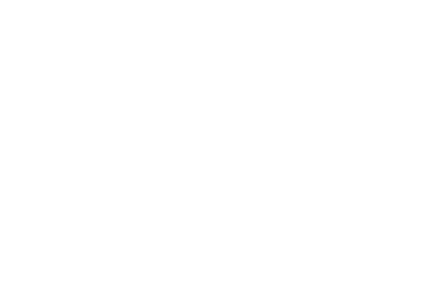

In [3]:
fig = plt.figure()
viewport = fig.add_axes([0,0,1,1],frameon=False,label ="viewport",facecolor = 'k')
viewport.xaxis.set_visible(False)
viewport.yaxis.set_visible(False)
from functools import partial
rect = patches.Rectangle((0.5,0.5),0.1,0.1,color = 'r')
tick = partial(update_rect,viewport= viewport,rect=rect)


In [4]:
fps = 30
writer = animation.writers['ffmpeg']
writer = writer(fps =30, metadata=dict(artist='Keene Chin'), bitrate=100)
ani = animation.FuncAnimation(fig,func=tick,interval=1000//fps,frames=1000,blit=True)
ani.save('test.mp4', writer=writer)

